# Train a standard cyclegan model with simple synthetic images.

In [1]:
# imports
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from os import listdir, mkdir
import os
import numpy as np
import time
import pickle
# add parent dir to syspath
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

from imageGenerators.imgGen_simple import synth_generator
from models.cyclegan_simple import cyclegan

In [2]:
# parameters
imagesPerDomain = 500
n_test = 10
epochs = 4
n_digits = 5

epochs_finished = 0

modelpath = Path("D:/m2/savedmodels/cyclegan_simple/") # where to save/load model

# Generate synthData

In [3]:
datasetPath = Path("C:/Users/andre/Desktop/m/datasets/Chars74K/English/Fnt") # dataset of digitimages, input to synth.Imagegenerator
# dataset contains for each digit one folder with images:
# digit '0' -> folder 'Sample001', ..., digit '9' -> folder 'Sample010'

# get folder of every digit (Sample001 - Sample 010)
digitFolders = [
    datasetPath / ("Sample00" + str(digit)) for digit in range(1,10)
]
digitFolders.append(datasetPath / "Sample010")

# map each digit to list of imagepaths
digitImagePaths = []
for digitFolder in digitFolders:
    imagePaths = [digitFolder / imageName for imageName in listdir(digitFolder)]
    digitImagePaths.append(imagePaths)
    
n_fonts = 1 # number of fonts to load
# open images 
digitImages = [
    [cv2.imread(str(digitImagePaths[digit][fontindex]), cv2.IMREAD_GRAYSCALE) for fontindex in range(n_fonts)]
    for digit in range(10)
]

# generate images
synthGenerator = synth_generator(digitImages)
digitsTrain = np.random.randint(0,10,size=(imagesPerDomain, n_digits))
digitsTest = np.random.randint(0,10,size=(n_test, n_digits))
margins = [20 for _ in range(0, n_digits - 1)]
border = (2, 2, 2, 2)
synthTrain = [
    synthGenerator.generate_image(digitsTrain[i], margins, border)
    for i in range(len(digitsTrain))
]
synthTest = [
    synthGenerator.generate_image(digitsTest[i], margins, border)
    for i in range(len(digitsTest))
]

In [4]:
"""# peek
for i in range(10):
    plt.imshow(synthTrain[i], cmap='gray')
    plt.show()"""

"# peek\nfor i in range(10):\n    plt.imshow(synthImages[i], cmap='gray')\n    plt.show()"

# load realdata

In [5]:
filePath = Path("C:/Users/andre/Desktop/m/datasets/SCUT-WMN DataSet/easy_samples")
imagePaths = [
    str(filePath / imageName) for imageName in listdir(filePath)
]
# shuffle filepaths, then load images
np.random.shuffle(imagePaths)
imagePaths = imagePaths[0:imagesPerDomain]
real = [
    cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE) for imagepath in imagePaths
]

In [6]:
"""# peek
for i in range(10):
    plt.imshow(real[i], cmap='gray')
    plt.show()"""

"# peek\nfor i in range(10):\n    plt.imshow(real[i], cmap='gray')\n    plt.show()"

# prepare data for cyclegan

In [7]:
# rescale images to 128x128
width = 128; height = 128
originalShape = synthTrain[0].shape[0:2]
synthTrain = [
    cv2.resize(image, (width, height)) for image in synthTrain
]
synthTest = [
    cv2.resize(image, (width, height)) for image in synthTest
]

real = [
    cv2.resize(image, (width, height)) for image in real
]

In [8]:
# convert to float, normalize to [-1,1]
synthTrain = np.array(synthTrain).astype("float32")
synthTrain = (synthTrain - 127.5) / 127.5
synthTest = np.array(synthTest).astype("float32")
synthTest = (synthTest - 127.5) / 127.5

real = np.array(real).astype("float32")
real = (real - 127.5) / 127.5

In [9]:
# duplicate to 3-channel
synthTrain = np.reshape(synthTrain, (synthTrain.shape[0],synthTrain.shape[1],synthTrain.shape[2], 1))
synthTrain = np.repeat(synthTrain, 3, axis=3)
synthTest = np.reshape(synthTest, (synthTest.shape[0],synthTest.shape[1],synthTest.shape[2], 1))
synthTest = np.repeat(synthTest, 3, axis=3)
real = np.reshape(real, (real.shape[0],real.shape[1],real.shape[2], 1))
real = np.repeat(real, 3, axis=3)

In [10]:
dataset = (synthTrain, real)

# Data ready for training

In [11]:
# create model in modelpath, or load it if folder already exists
cgModel = cyclegan(dataset, modelpath)

creating new model and folder


In [30]:
# train model
cgModel.startTraining(epochs=epochs, batchsize=1)
epochs_finished += epochs

training on 500 images per domain for 4 epochs and a batchsize of 1
>1/2000, dA[0.005,0.003] dB[0.062,0.063] g[2.782,2.302]
step took 2.774669 seconds
>2/2000, dA[0.002,0.009] dB[0.082,0.050] g[2.072,2.036]
step took 1.843224 seconds
>3/2000, dA[0.003,0.004] dB[0.006,0.014] g[1.763,2.377]
step took 1.855055 seconds
>4/2000, dA[0.015,0.009] dB[0.007,0.006] g[2.133,2.500]
step took 1.856124 seconds
>5/2000, dA[0.010,0.005] dB[0.171,0.086] g[2.219,2.546]
step took 1.869999 seconds
>6/2000, dA[0.007,0.003] dB[0.025,0.040] g[1.521,2.226]
step took 1.861024 seconds
>7/2000, dA[0.002,0.004] dB[0.075,0.004] g[2.377,2.249]
step took 1.873018 seconds
>8/2000, dA[0.002,0.005] dB[0.009,0.113] g[1.527,2.362]
step took 1.841544 seconds
>9/2000, dA[0.004,0.001] dB[0.078,0.027] g[1.846,2.362]
step took 1.849094 seconds
>10/2000, dA[0.003,0.010] dB[0.078,0.025] g[2.055,2.175]
step took 1.855042 seconds
>11/2000, dA[0.006,0.002] dB[0.045,0.167] g[1.442,2.436]
step took 1.850048 seconds
>12/2000, dA[0.00

>98/2000, dA[0.008,0.005] dB[0.019,0.017] g[2.185,2.561]
step took 1.844201 seconds
>99/2000, dA[0.009,0.009] dB[0.026,0.032] g[1.899,2.404]
step took 1.847253 seconds
>100/2000, dA[0.007,0.011] dB[0.044,0.022] g[1.995,2.413]
step took 1.851319 seconds
>101/2000, dA[0.017,0.013] dB[0.017,0.039] g[1.899,2.168]
step took 1.854607 seconds
>102/2000, dA[0.015,0.011] dB[0.007,0.025] g[2.048,2.507]
step took 1.842533 seconds
>103/2000, dA[0.008,0.006] dB[0.005,0.006] g[2.095,2.218]
step took 1.850237 seconds
>104/2000, dA[0.003,0.006] dB[0.262,0.040] g[1.861,2.592]
step took 1.843131 seconds
>105/2000, dA[0.011,0.003] dB[0.044,0.058] g[1.202,2.116]
step took 1.851891 seconds
>106/2000, dA[0.003,0.005] dB[0.008,0.078] g[1.464,2.298]
step took 1.859353 seconds
>107/2000, dA[0.003,0.002] dB[0.008,0.015] g[2.187,2.296]
step took 1.849832 seconds
>108/2000, dA[0.003,0.005] dB[0.102,0.023] g[2.467,2.409]
step took 1.858629 seconds
>109/2000, dA[0.004,0.004] dB[0.014,0.009] g[1.830,2.278]
step took

>195/2000, dA[0.003,0.012] dB[0.005,0.100] g[2.334,2.466]
step took 1.852138 seconds
>196/2000, dA[0.018,0.005] dB[0.016,0.082] g[1.738,2.211]
step took 1.853112 seconds
>197/2000, dA[0.006,0.015] dB[0.008,0.005] g[1.993,2.298]
step took 1.856487 seconds
>198/2000, dA[0.010,0.007] dB[0.026,0.041] g[2.217,2.241]
step took 1.852291 seconds
>199/2000, dA[0.010,0.007] dB[0.026,0.028] g[1.693,2.272]
step took 1.849855 seconds
>200/2000, dA[0.004,0.013] dB[0.007,0.018] g[1.927,2.334]
step took 1.854747 seconds
>201/2000, dA[0.003,0.006] dB[0.047,0.043] g[2.064,2.173]
step took 1.852458 seconds
>202/2000, dA[0.006,0.022] dB[0.191,0.023] g[2.006,1.927]
step took 1.859429 seconds
>203/2000, dA[0.012,0.003] dB[0.083,0.268] g[1.434,2.220]
step took 1.857506 seconds
>204/2000, dA[0.020,0.044] dB[0.014,0.029] g[1.763,1.835]
step took 1.855132 seconds
>205/2000, dA[0.050,0.010] dB[0.013,0.012] g[2.153,2.685]
step took 1.852512 seconds
>206/2000, dA[0.015,0.006] dB[0.013,0.006] g[2.363,2.828]
step to

>292/2000, dA[0.006,0.003] dB[0.024,0.103] g[1.478,2.391]
step took 1.851200 seconds
>293/2000, dA[0.003,0.021] dB[0.041,0.016] g[1.307,1.764]
step took 1.862139 seconds
>294/2000, dA[0.004,0.025] dB[0.010,0.335] g[1.234,1.890]
step took 1.850269 seconds
>295/2000, dA[0.064,0.017] dB[0.040,0.010] g[2.007,2.701]
step took 1.857378 seconds
>296/2000, dA[0.007,0.022] dB[0.031,0.005] g[2.466,2.118]
step took 1.858237 seconds
>297/2000, dA[0.006,0.008] dB[0.002,0.052] g[1.942,2.685]
step took 1.849614 seconds
>298/2000, dA[0.021,0.012] dB[0.008,0.013] g[2.384,2.373]
step took 1.858073 seconds
>299/2000, dA[0.017,0.034] dB[0.003,0.007] g[2.193,1.896]
step took 1.859166 seconds
>300/2000, dA[0.015,0.025] dB[0.130,0.044] g[2.143,2.400]
step took 1.849242 seconds
>301/2000, dA[0.032,0.007] dB[0.016,0.045] g[1.535,2.474]
step took 1.850321 seconds
>302/2000, dA[0.017,0.020] dB[0.011,0.007] g[1.833,2.004]
step took 1.855334 seconds
>303/2000, dA[0.017,0.010] dB[0.038,0.009] g[2.055,2.305]
step to

>389/2000, dA[0.001,0.010] dB[0.013,0.008] g[2.102,2.088]
step took 1.857336 seconds
>390/2000, dA[0.006,0.007] dB[0.006,0.014] g[2.030,2.288]
step took 1.854811 seconds
>391/2000, dA[0.005,0.017] dB[0.018,0.010] g[1.589,2.266]
step took 1.851764 seconds
>392/2000, dA[0.005,0.006] dB[0.007,0.070] g[1.597,2.106]
step took 1.855599 seconds
>393/2000, dA[0.008,0.004] dB[0.008,0.015] g[1.724,2.141]
step took 1.851771 seconds
>394/2000, dA[0.004,0.002] dB[0.005,0.008] g[2.289,2.239]
step took 1.857091 seconds
>395/2000, dA[0.005,0.004] dB[0.008,0.016] g[2.249,2.399]
step took 1.852927 seconds
>396/2000, dA[0.002,0.003] dB[0.008,0.028] g[1.827,2.066]
step took 1.853557 seconds
>397/2000, dA[0.001,0.002] dB[0.026,0.024] g[2.149,2.231]
step took 1.858821 seconds
>398/2000, dA[0.001,0.013] dB[0.007,0.005] g[1.745,2.016]
step took 1.846686 seconds
>399/2000, dA[0.003,0.046] dB[0.010,0.006] g[1.795,1.711]
step took 1.856947 seconds
>400/2000, dA[0.087,0.009] dB[0.002,0.025] g[1.730,2.714]
step to

>486/2000, dA[0.005,0.012] dB[0.017,0.003] g[1.977,2.205]
step took 1.852488 seconds
>487/2000, dA[0.018,0.005] dB[0.009,0.007] g[2.084,2.591]
step took 1.846321 seconds
>488/2000, dA[0.017,0.017] dB[0.017,0.013] g[1.635,2.213]
step took 1.850767 seconds
>489/2000, dA[0.005,0.006] dB[0.006,0.083] g[1.697,2.321]
step took 1.860617 seconds
>490/2000, dA[0.008,0.007] dB[0.005,0.018] g[1.638,2.274]
step took 1.857350 seconds
>491/2000, dA[0.013,0.017] dB[0.020,0.033] g[1.749,2.141]
step took 1.857212 seconds
>492/2000, dA[0.035,0.019] dB[0.043,0.009] g[2.034,2.568]
step took 1.854916 seconds
>493/2000, dA[0.017,0.017] dB[0.025,0.012] g[1.433,2.098]
step took 1.852576 seconds
>494/2000, dA[0.005,0.010] dB[0.047,0.173] g[1.532,2.418]
step took 1.851286 seconds
>495/2000, dA[0.004,0.005] dB[0.126,0.010] g[1.922,2.402]
step took 1.858680 seconds
>496/2000, dA[0.003,0.005] dB[0.009,0.003] g[1.836,2.109]
step took 1.852932 seconds
>497/2000, dA[0.007,0.004] dB[0.091,0.051] g[2.113,2.384]
step to

>583/2000, dA[0.055,0.011] dB[0.063,0.114] g[1.784,2.638]
step took 1.847616 seconds
>584/2000, dA[0.041,0.029] dB[0.014,0.007] g[1.745,2.207]
step took 1.855022 seconds
>585/2000, dA[0.030,0.014] dB[0.054,0.017] g[2.153,2.591]
step took 1.852302 seconds
>586/2000, dA[0.008,0.003] dB[0.014,0.047] g[1.452,2.168]
step took 1.857800 seconds
>587/2000, dA[0.008,0.003] dB[0.005,0.273] g[1.141,1.997]
step took 1.852345 seconds
>588/2000, dA[0.003,0.007] dB[0.105,0.035] g[2.432,2.444]
step took 1.851079 seconds
>589/2000, dA[0.014,0.003] dB[0.168,0.063] g[2.113,2.300]
step took 1.848894 seconds
>590/2000, dA[0.003,0.003] dB[0.007,0.037] g[1.513,1.893]
step took 1.847646 seconds
>591/2000, dA[0.004,0.007] dB[0.011,0.011] g[1.655,1.776]
step took 1.854995 seconds
>592/2000, dA[0.003,0.004] dB[0.018,0.007] g[1.991,2.138]
step took 1.860320 seconds
>593/2000, dA[0.013,0.004] dB[0.062,0.033] g[1.578,2.251]
step took 1.855879 seconds
>594/2000, dA[0.004,0.004] dB[0.006,0.014] g[1.309,2.355]
step to

>680/2000, dA[0.007,0.021] dB[0.012,0.012] g[2.573,2.428]
step took 1.857552 seconds
>681/2000, dA[0.055,0.011] dB[0.004,0.008] g[2.544,2.910]
step took 1.862676 seconds
>682/2000, dA[0.008,0.006] dB[0.004,0.008] g[2.123,2.241]
step took 1.879749 seconds
>683/2000, dA[0.002,0.006] dB[0.027,0.020] g[2.038,2.410]
step took 1.868767 seconds
>684/2000, dA[0.008,0.008] dB[0.003,0.006] g[1.839,2.267]
step took 1.870950 seconds
>685/2000, dA[0.012,0.007] dB[0.004,0.010] g[2.081,2.229]
step took 1.871745 seconds
>686/2000, dA[0.002,0.006] dB[0.020,0.009] g[1.891,2.466]
step took 1.868734 seconds
>687/2000, dA[0.004,0.005] dB[0.032,0.144] g[1.422,2.192]
step took 1.869474 seconds
>688/2000, dA[0.008,0.008] dB[0.122,0.024] g[2.712,2.588]
step took 1.859810 seconds
>689/2000, dA[0.002,0.004] dB[0.009,0.044] g[1.950,2.544]
step took 1.857433 seconds
>690/2000, dA[0.003,0.005] dB[0.003,0.028] g[2.082,2.634]
step took 1.855180 seconds
>691/2000, dA[0.007,0.002] dB[0.051,0.034] g[2.133,2.234]
step to

>777/2000, dA[0.002,0.007] dB[0.020,0.007] g[1.892,2.361]
step took 1.852223 seconds
>778/2000, dA[0.002,0.007] dB[0.006,0.018] g[1.807,2.536]
step took 1.860983 seconds
>779/2000, dA[0.006,0.004] dB[0.006,0.027] g[1.685,2.132]
step took 1.856971 seconds
>780/2000, dA[0.008,0.005] dB[0.020,0.017] g[1.840,2.315]
step took 1.855006 seconds
>781/2000, dA[0.003,0.009] dB[0.005,0.010] g[2.088,2.432]
step took 1.854630 seconds
>782/2000, dA[0.002,0.003] dB[0.015,0.005] g[1.652,2.365]
step took 1.857286 seconds
>783/2000, dA[0.007,0.004] dB[0.040,0.004] g[1.467,2.210]
step took 1.853561 seconds
>784/2000, dA[0.004,0.005] dB[0.025,0.204] g[1.312,2.058]
step took 1.851959 seconds
>785/2000, dA[0.005,0.012] dB[0.147,0.021] g[1.941,2.351]
step took 1.851368 seconds
>786/2000, dA[0.018,0.032] dB[0.005,0.005] g[2.045,1.983]
step took 1.850188 seconds
>787/2000, dA[0.020,0.018] dB[0.010,0.008] g[2.397,2.986]
step took 1.859645 seconds
>788/2000, dA[0.021,0.009] dB[0.004,0.002] g[1.720,2.268]
step to

>874/2000, dA[0.007,0.013] dB[0.015,0.012] g[2.034,2.100]
step took 1.853117 seconds
>875/2000, dA[0.007,0.005] dB[0.008,0.009] g[1.703,2.372]
step took 1.849479 seconds
>876/2000, dA[0.004,0.003] dB[0.005,0.007] g[1.944,2.244]
step took 1.851058 seconds
>877/2000, dA[0.002,0.013] dB[0.166,0.027] g[2.010,2.273]
step took 1.847095 seconds
>878/2000, dA[0.007,0.005] dB[0.030,0.009] g[1.303,2.196]
step took 1.858693 seconds
>879/2000, dA[0.003,0.005] dB[0.012,0.010] g[1.135,2.189]
step took 1.853094 seconds
>880/2000, dA[0.012,0.002] dB[0.007,0.006] g[1.227,2.183]
step took 1.852998 seconds
>881/2000, dA[0.009,0.005] dB[0.008,0.013] g[1.262,2.134]
step took 1.852055 seconds
>882/2000, dA[0.002,0.002] dB[0.005,0.437] g[1.038,2.218]
step took 1.867407 seconds
>883/2000, dA[0.028,0.007] dB[0.054,0.083] g[2.239,2.472]
step took 1.856106 seconds
>884/2000, dA[0.005,0.012] dB[0.088,0.012] g[2.338,1.981]
step took 1.852273 seconds
>885/2000, dA[0.005,0.006] dB[0.013,0.006] g[1.626,2.289]
step to

>971/2000, dA[0.006,0.004] dB[0.005,0.030] g[1.800,2.271]
step took 1.849502 seconds
>972/2000, dA[0.009,0.013] dB[0.055,0.006] g[1.849,2.324]
step took 1.854083 seconds
>973/2000, dA[0.006,0.004] dB[0.018,0.075] g[1.599,2.285]
step took 1.859471 seconds
>974/2000, dA[0.046,0.042] dB[0.011,0.011] g[1.800,2.345]
step took 1.853702 seconds
>975/2000, dA[0.026,0.010] dB[0.041,0.008] g[1.462,2.179]
step took 1.858464 seconds
>976/2000, dA[0.008,0.020] dB[0.005,0.003] g[1.236,2.174]
step took 1.859283 seconds
>977/2000, dA[0.012,0.003] dB[0.006,0.007] g[1.010,2.064]
step took 1.841416 seconds
>978/2000, dA[0.008,0.020] dB[0.012,0.362] g[1.161,2.319]
step took 1.851358 seconds
>979/2000, dA[0.012,0.006] dB[0.056,0.031] g[1.767,2.132]
step took 1.853254 seconds
>980/2000, dA[0.016,0.004] dB[0.020,0.007] g[2.166,2.189]
step took 1.847715 seconds
>981/2000, dA[0.032,0.028] dB[0.005,0.007] g[1.853,2.258]
step took 1.850893 seconds
>982/2000, dA[0.010,0.024] dB[0.009,0.046] g[1.639,2.021]
step to

>1067/2000, dA[0.009,0.006] dB[0.011,0.015] g[1.959,2.138]
step took 1.852509 seconds
>1068/2000, dA[0.005,0.004] dB[0.011,0.004] g[2.251,2.444]
step took 1.852261 seconds
>1069/2000, dA[0.002,0.006] dB[0.098,0.023] g[1.794,2.226]
step took 1.854898 seconds
>1070/2000, dA[0.011,0.003] dB[0.055,0.015] g[1.654,2.228]
step took 1.856060 seconds
>1071/2000, dA[0.003,0.003] dB[0.013,0.012] g[1.872,2.183]
step took 1.858239 seconds
>1072/2000, dA[0.014,0.006] dB[0.018,0.003] g[2.186,2.206]
step took 1.853361 seconds
>1073/2000, dA[0.007,0.011] dB[0.005,0.037] g[1.749,2.289]
step took 1.851419 seconds
>1074/2000, dA[0.008,0.007] dB[0.038,0.013] g[1.866,2.540]
step took 1.859416 seconds
>1075/2000, dA[0.018,0.010] dB[0.011,0.017] g[1.836,2.254]
step took 1.881938 seconds
>1076/2000, dA[0.003,0.003] dB[0.010,0.012] g[1.679,2.142]
step took 1.867273 seconds
>1077/2000, dA[0.003,0.015] dB[0.005,0.096] g[1.419,2.155]
step took 1.870970 seconds
>1078/2000, dA[0.009,0.025] dB[0.156,0.005] g[2.406,2.

>1163/2000, dA[0.003,0.003] dB[0.004,0.006] g[1.403,2.297]
step took 1.865684 seconds
>1164/2000, dA[0.002,0.004] dB[0.008,0.321] g[1.144,2.245]
step took 1.867418 seconds
>1165/2000, dA[0.001,0.006] dB[0.141,0.012] g[1.997,2.094]
step took 1.871273 seconds
>1166/2000, dA[0.006,0.003] dB[0.084,0.014] g[2.028,1.954]
step took 1.886821 seconds
>1167/2000, dA[0.013,0.004] dB[0.021,0.085] g[1.254,1.959]
step took 2.507617 seconds
>1168/2000, dA[0.008,0.003] dB[0.017,0.018] g[2.030,2.113]
step took 1.853510 seconds
>1169/2000, dA[0.003,0.002] dB[0.042,0.045] g[1.644,1.746]
step took 1.849947 seconds
>1170/2000, dA[0.001,0.002] dB[0.037,0.019] g[1.410,2.057]
step took 1.850866 seconds
>1171/2000, dA[0.001,0.004] dB[0.017,0.029] g[1.986,1.932]
step took 1.857413 seconds
>1172/2000, dA[0.005,0.006] dB[0.011,0.016] g[1.608,2.103]
step took 1.857046 seconds
>1173/2000, dA[0.007,0.004] dB[0.008,0.006] g[1.315,2.015]
step took 1.848957 seconds
>1174/2000, dA[0.001,0.004] dB[0.024,0.046] g[1.581,2.

>1259/2000, dA[0.006,0.013] dB[0.049,0.011] g[1.837,2.089]
step took 1.851586 seconds
>1260/2000, dA[0.006,0.007] dB[0.012,0.104] g[1.400,2.004]
step took 1.846874 seconds
>1261/2000, dA[0.015,0.004] dB[0.006,0.010] g[2.155,2.058]
step took 1.851495 seconds
>1262/2000, dA[0.001,0.008] dB[0.101,0.011] g[2.147,1.824]
step took 1.861203 seconds
>1263/2000, dA[0.006,0.009] dB[0.036,0.009] g[1.540,1.899]
step took 1.867759 seconds
>1264/2000, dA[0.003,0.006] dB[0.016,0.009] g[1.816,2.282]
step took 1.852113 seconds
>1265/2000, dA[0.004,0.004] dB[0.033,0.013] g[1.234,2.069]
step took 1.858406 seconds
>1266/2000, dA[0.001,0.003] dB[0.059,0.004] g[1.182,2.255]
step took 1.856588 seconds
>1267/2000, dA[0.005,0.003] dB[0.012,0.181] g[1.070,1.890]
step took 1.859008 seconds
>1268/2000, dA[0.001,0.004] dB[0.350,0.021] g[2.987,2.747]
step took 1.852785 seconds
>1269/2000, dA[0.002,0.002] dB[0.033,0.036] g[1.405,2.120]
step took 1.846965 seconds
>1270/2000, dA[0.003,0.005] dB[0.009,0.039] g[1.477,1.

>1355/2000, dA[0.001,0.005] dB[0.006,0.020] g[1.461,2.005]
step took 1.864424 seconds
>1356/2000, dA[0.006,0.004] dB[0.176,0.038] g[2.174,2.201]
step took 1.869041 seconds
>1357/2000, dA[0.002,0.004] dB[0.028,0.039] g[1.287,1.875]
step took 1.862325 seconds
>1358/2000, dA[0.002,0.005] dB[0.008,0.005] g[1.775,2.166]
step took 1.868469 seconds
>1359/2000, dA[0.002,0.003] dB[0.101,0.027] g[2.147,2.387]
step took 1.878690 seconds
>1360/2000, dA[0.007,0.001] dB[0.026,0.020] g[1.681,2.003]
step took 1.863786 seconds
>1361/2000, dA[0.007,0.008] dB[0.074,0.071] g[1.578,2.085]
step took 1.869852 seconds
>1362/2000, dA[0.002,0.003] dB[0.007,0.005] g[1.700,2.066]
step took 1.867315 seconds
>1363/2000, dA[0.005,0.005] dB[0.255,0.005] g[1.997,1.959]
step took 1.871815 seconds
>1364/2000, dA[0.003,0.003] dB[0.020,0.015] g[1.164,1.943]
step took 1.853631 seconds
>1365/2000, dA[0.004,0.021] dB[0.030,0.082] g[1.126,1.986]
step took 1.856741 seconds
>1366/2000, dA[0.011,0.005] dB[0.422,0.017] g[1.868,2.

>1451/2000, dA[0.007,0.002] dB[0.031,0.005] g[1.398,2.278]
step took 1.857374 seconds
>1452/2000, dA[0.001,0.001] dB[0.023,0.009] g[1.147,2.063]
step took 1.861723 seconds
>1453/2000, dA[0.001,0.001] dB[0.023,0.238] g[0.967,1.901]
step took 1.868960 seconds
>1454/2000, dA[0.001,0.001] dB[0.127,0.014] g[1.623,2.019]
step took 1.863022 seconds
>1455/2000, dA[0.001,0.001] dB[0.256,0.046] g[1.562,1.975]
step took 1.867030 seconds
>1456/2000, dA[0.001,0.001] dB[0.139,0.042] g[1.034,1.988]
step took 1.866050 seconds
>1457/2000, dA[0.011,0.002] dB[0.110,0.307] g[1.012,1.854]
step took 1.860119 seconds
>1458/2000, dA[0.011,0.010] dB[0.018,0.014] g[1.639,2.029]
step took 1.856443 seconds
>1459/2000, dA[0.003,0.005] dB[0.154,0.008] g[2.366,2.156]
step took 1.867812 seconds
>1460/2000, dA[0.001,0.007] dB[0.010,0.105] g[1.647,1.926]
step took 1.868197 seconds
>1461/2000, dA[0.007,0.004] dB[0.007,0.007] g[1.809,2.043]
step took 1.873076 seconds
>1462/2000, dA[0.008,0.008] dB[0.350,0.091] g[3.122,2.

>1547/2000, dA[0.002,0.006] dB[0.035,0.061] g[1.515,1.981]
step took 1.866484 seconds
>1548/2000, dA[0.004,0.002] dB[0.006,0.015] g[1.474,1.967]
step took 1.870077 seconds
>1549/2000, dA[0.005,0.003] dB[0.005,0.013] g[1.528,1.948]
step took 1.867329 seconds
>1550/2000, dA[0.002,0.004] dB[0.014,0.025] g[1.685,1.890]
step took 1.869822 seconds
>1551/2000, dA[0.002,0.003] dB[0.008,0.073] g[1.484,1.939]
step took 1.871325 seconds
>1552/2000, dA[0.001,0.004] dB[0.009,0.008] g[1.495,1.916]
step took 1.853383 seconds
>1553/2000, dA[0.004,0.002] dB[0.051,0.045] g[1.694,1.993]
step took 1.852077 seconds
>1554/2000, dA[0.002,0.006] dB[0.053,0.007] g[3.821,3.316]
step took 1.857046 seconds
>1555/2000, dA[0.001,0.003] dB[0.009,0.019] g[1.673,2.056]
step took 1.852828 seconds
>1556/2000, dA[0.004,0.001] dB[0.014,0.015] g[1.669,2.096]
step took 1.851291 seconds
>1557/2000, dA[0.002,0.003] dB[0.010,0.050] g[1.819,2.573]
step took 1.852076 seconds
>1558/2000, dA[0.001,0.002] dB[0.012,0.010] g[3.875,3.

>1643/2000, dA[0.006,0.001] dB[0.040,0.005] g[1.733,1.978]
step took 1.846427 seconds
>1644/2000, dA[0.002,0.003] dB[0.005,0.012] g[1.300,1.894]
step took 1.853042 seconds
>1645/2000, dA[0.003,0.001] dB[0.006,0.073] g[1.496,2.172]
step took 1.849692 seconds
>1646/2000, dA[0.003,0.001] dB[0.005,0.003] g[1.824,2.231]
step took 1.855127 seconds
>1647/2000, dA[0.002,0.001] dB[0.047,0.010] g[1.532,1.926]
step took 1.867047 seconds
>1648/2000, dA[0.003,0.003] dB[0.042,0.011] g[1.791,2.352]
step took 1.861008 seconds
>1649/2000, dA[0.002,0.001] dB[0.011,0.004] g[1.001,1.993]
step took 1.855113 seconds
>1650/2000, dA[0.002,0.002] dB[0.069,0.282] g[0.918,1.961]
step took 1.852186 seconds
>1651/2000, dA[0.002,0.010] dB[0.188,0.012] g[2.346,2.008]
step took 1.861128 seconds
>1652/2000, dA[0.004,0.008] dB[0.057,0.005] g[1.906,1.972]
step took 1.850979 seconds
>1653/2000, dA[0.021,0.003] dB[0.019,0.284] g[1.394,2.042]
step took 1.853017 seconds
>1654/2000, dA[0.003,0.005] dB[0.109,0.016] g[1.893,2.

>1739/2000, dA[0.004,0.002] dB[0.005,0.066] g[1.231,1.837]
step took 1.845873 seconds
>1740/2000, dA[0.001,0.003] dB[0.285,0.003] g[1.872,2.031]
step took 1.854759 seconds
>1741/2000, dA[0.005,0.001] dB[0.017,0.028] g[1.532,1.872]
step took 1.856331 seconds
>1742/2000, dA[0.002,0.005] dB[0.050,0.101] g[2.023,2.479]
step took 1.850296 seconds
>1743/2000, dA[0.004,0.002] dB[0.030,0.008] g[1.870,2.014]
step took 1.857405 seconds
>1744/2000, dA[0.006,0.004] dB[0.007,0.037] g[1.520,1.959]
step took 1.852683 seconds
>1745/2000, dA[0.006,0.001] dB[0.004,0.027] g[1.506,2.038]
step took 1.851460 seconds
>1746/2000, dA[0.006,0.009] dB[0.196,0.006] g[1.753,1.952]
step took 1.843798 seconds
>1747/2000, dA[0.002,0.007] dB[0.030,0.016] g[0.892,1.803]
step took 1.858079 seconds
>1748/2000, dA[0.016,0.001] dB[0.012,0.187] g[0.940,1.973]
step took 1.849966 seconds
>1749/2000, dA[0.012,0.011] dB[0.143,0.009] g[2.437,2.055]
step took 1.852177 seconds
>1750/2000, dA[0.004,0.002] dB[0.004,0.010] g[1.830,2.

>1835/2000, dA[0.004,0.001] dB[0.047,0.028] g[2.062,1.982]
step took 1.841707 seconds
>1836/2000, dA[0.003,0.004] dB[0.005,0.039] g[1.480,2.039]
step took 1.852160 seconds
>1837/2000, dA[0.002,0.003] dB[0.057,0.022] g[1.740,1.986]
step took 1.848137 seconds
>1838/2000, dA[0.005,0.009] dB[0.046,0.050] g[1.164,1.932]
step took 1.855577 seconds
>1839/2000, dA[0.011,0.003] dB[0.054,0.011] g[1.950,2.041]
step took 1.856693 seconds
>1840/2000, dA[0.006,0.006] dB[0.006,0.037] g[1.672,1.989]
step took 1.855958 seconds
>1841/2000, dA[0.002,0.005] dB[0.039,0.006] g[2.075,1.836]
step took 1.849647 seconds
>1842/2000, dA[0.009,0.002] dB[0.059,0.121] g[1.395,2.020]
step took 1.850615 seconds
>1843/2000, dA[0.006,0.003] dB[0.006,0.003] g[1.478,1.818]
step took 1.860094 seconds
>1844/2000, dA[0.001,0.002] dB[0.006,0.009] g[1.665,1.859]
step took 1.849525 seconds
>1845/2000, dA[0.006,0.002] dB[0.052,0.003] g[1.684,2.003]
step took 1.851544 seconds
>1846/2000, dA[0.001,0.005] dB[0.029,0.059] g[1.052,1.

>1931/2000, dA[0.001,0.001] dB[0.029,0.010] g[1.597,1.914]
step took 1.862613 seconds
>1932/2000, dA[0.004,0.003] dB[0.008,0.011] g[1.610,2.086]
step took 1.851370 seconds
>1933/2000, dA[0.004,0.007] dB[0.023,0.054] g[1.410,1.984]
step took 1.848235 seconds
>1934/2000, dA[0.004,0.009] dB[0.006,0.031] g[1.774,2.154]
step took 1.857296 seconds
>1935/2000, dA[0.009,0.001] dB[0.037,0.034] g[1.630,1.899]
step took 1.872131 seconds
>1936/2000, dA[0.009,0.008] dB[0.010,0.026] g[1.544,1.907]
step took 1.865826 seconds
>1937/2000, dA[0.002,0.003] dB[0.015,0.022] g[1.479,2.263]
step took 1.862514 seconds
>1938/2000, dA[0.011,0.006] dB[0.037,0.008] g[1.456,2.003]
step took 1.860331 seconds
>1939/2000, dA[0.001,0.007] dB[0.014,0.012] g[1.134,1.952]
step took 1.865382 seconds
>1940/2000, dA[0.016,0.003] dB[0.022,0.031] g[1.095,1.951]
step took 1.860146 seconds
>1941/2000, dA[0.003,0.009] dB[0.010,0.180] g[1.083,1.996]
step took 1.864615 seconds
>1942/2000, dA[0.005,0.003] dB[0.037,0.044] g[1.865,1.

In [31]:
# save model
cgModel.saveModels()

In [32]:
# generate some samples
samples = cgModel.gen_AtoB.predict(synthTest)
# undo normalization, convert back to 1-channel grayscale, resize back to original width
samples = samples * 127.5 + 127.5
samples = [
    cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in samples
]
samplesScaled = [
    cv2.resize(image, (originalShape[1], originalShape[0])) for image in samples
]

In [33]:
# save samples
samplePath = modelpath / "samples"
# create folder if necessary
if not samplePath.exists():
    samplePath.mkdir()
    
currentsamplePath = samplePath / ("epoch_%d" % (epochs_finished))
currentsamplePath.mkdir()

for i, sample in enumerate(samplesScaled):
    imagePath = currentsamplePath / ("%d.png" % (i))
    imagePath = str(imagePath)
    cv2.imwrite(imagePath, sample)

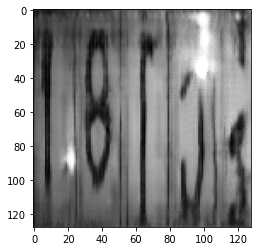

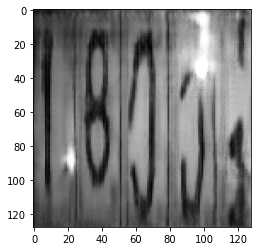

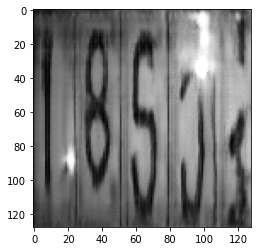

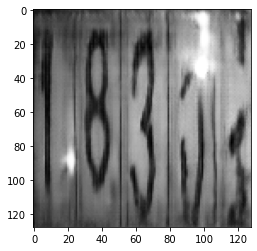

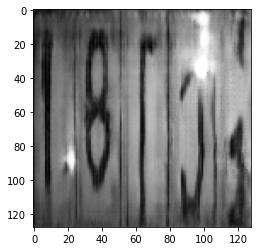

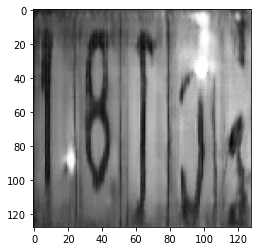

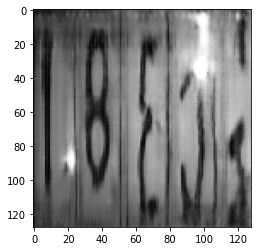

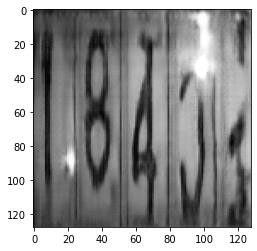

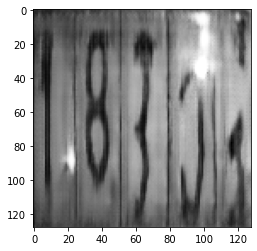

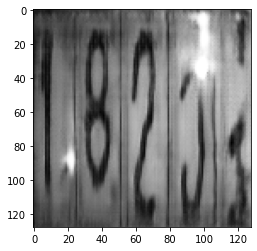

In [34]:
for i in range(10):
    plt.imshow(samples[i], cmap='gray')
    plt.show()

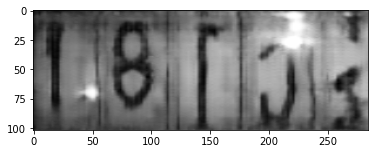

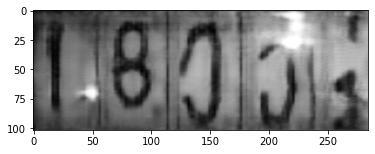

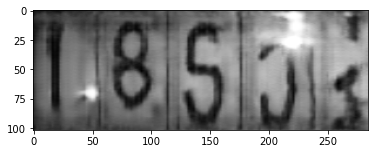

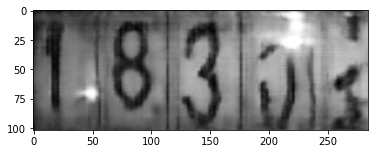

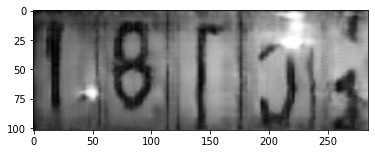

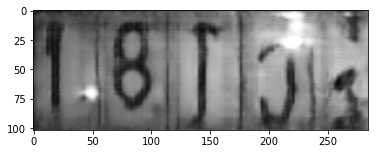

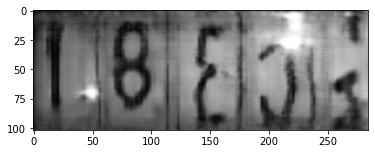

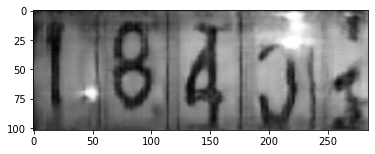

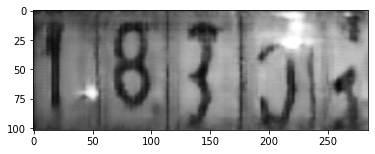

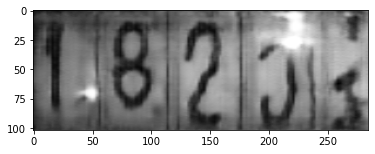

In [35]:
for i in range(10):
    plt.imshow(samplesScaled[i], cmap='gray')
    plt.show()